<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a serious of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [245]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [246]:
movies = pd.read_csv('./data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [247]:
# Answer:
movies.shape

(979, 6)

#### Check the data type of each column.

In [248]:
# Answer:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [249]:
# Answer:
movies["duration"].mean()

120.97957099080695

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [250]:
# Answer:
sorted_by_duration_pdf = movies.sort_values("duration")
shortest_movie = sorted_by_duration_pdf.head(1)
longest_movie = sorted_by_duration_pdf.tail(1)
print(shortest_movie)
print(longest_movie)

     star_rating   title content_rating  genre  duration  \
389          8.0  Freaks        UNRATED  Drama        64   

                                           actors_list  
389  [u'Wallace Ford', u'Leila Hyams', u'Olga Bacla...  
     star_rating   title content_rating  genre  duration  \
476          7.8  Hamlet          PG-13  Drama       242   

                                           actors_list  
476  [u'Kenneth Branagh', u'Julie Christie', u'Dere...  


#### Create a histogram of duration, choosing an "appropriate" number of bins.

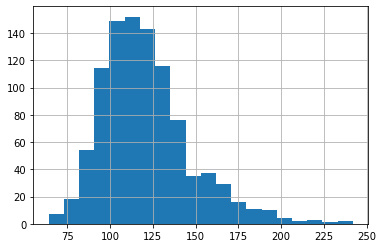

In [251]:
# Answer:
movies["duration"].hist(bins=20);

#### Use a box plot to display that same data.

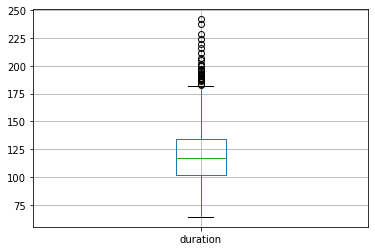

In [252]:
# Answer:
movies[["duration"]].boxplot();

## Intermediate level

#### Count how many movies have each of the content ratings.

In [255]:
# Answer:
movies_per_content_rating = movies["content_rating"].value_counts()
movies_per_content_rating

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
PASSED         7
NC-17          7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

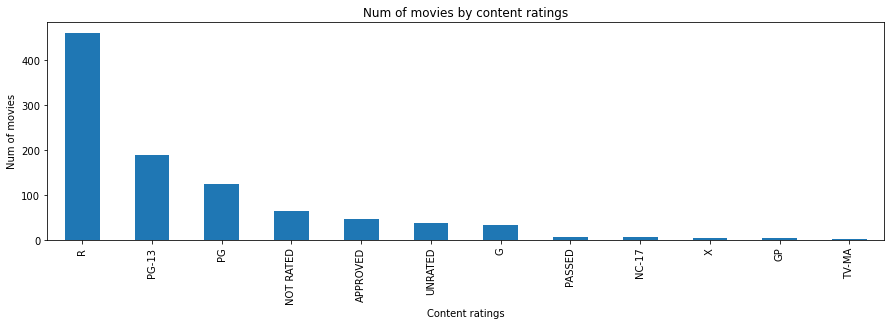

In [256]:
# Answer:
movies_per_content_rating.plot(kind="bar", figsize=(15, 4), title="Num of movies by content ratings", xlabel="Content ratings", ylabel="Num of movies");

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [257]:
# Answer:
mask = movies["content_rating"].isin(["NOT RATED", "APPROVED", "PASSED", "GP"])
movies.loc[mask, "content_rating"] = "UNRATED"
movies["content_rating"].value_counts()

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17        7
X            4
TV-MA        1
Name: content_rating, dtype: int64

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [258]:
# Answer:
mask = movies["content_rating"].isin(["X", "TV-MA"])
movies.loc[mask, "content_rating"] = "NC-17"
movies["content_rating"].value_counts()

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17       12
Name: content_rating, dtype: int64

#### Count the number of missing values in each column.

In [259]:
# Answer:
movies.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [260]:
# Answer:
movies.loc[movies["content_rating"].isnull(), "content_rating"] = "UNRATED"
movies.isnull().sum()

star_rating       0
title             0
content_rating    0
genre             0
duration          0
actors_list       0
dtype: int64

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [261]:
# Answer:
avg_star_rating_for_long_movies = movies[movies["duration"] >= 120]["star_rating"].mean()
avg_star_rating_for_short_movies = movies[movies["duration"] < 120]["star_rating"].mean()
print(avg_star_rating_for_long_movies)
print(avg_star_rating_for_short_movies)

7.948898678414082
7.838666666666657


#### Use a visualization to detect whether there is a relationship between duration and star rating.

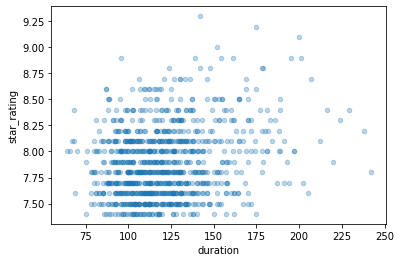

In [262]:
# Answer:
movies.plot(kind="scatter", x="duration", y="star_rating", alpha=0.3);

#### Calculate the average duration for each genre.

In [263]:
# Answer:
movies.groupby("genre")["duration"].mean()

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

## Advanced level

#### Visualize the relationship between content rating and duration.

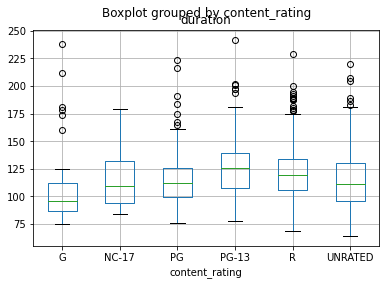

In [266]:
# Answer:
movies.boxplot(column="duration", by="content_rating");

#### Determine the top rated movie (by star rating) for each genre.

In [270]:
# Answer:
movies.sort_values("star_rating", ascending=False).groupby("genre")["title"].first()

genre
Action                                     The Dark Knight
Adventure    The Lord of the Rings: The Return of the King
Animation                                    Spirited Away
Biography                                 Schindler's List
Comedy                                        Modern Times
Crime                             The Shawshank Redemption
Drama                                         12 Angry Men
Family                          E.T. the Extra-Terrestrial
Fantasy                          The City of Lost Children
Film-Noir                                    The Third Man
History                                Battleship Potemkin
Horror                                              Psycho
Mystery                                        Rear Window
Sci-Fi                                        Blade Runner
Thriller                                 Shadow of a Doubt
Western                     The Good, the Bad and the Ugly
Name: title, dtype: object

#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [271]:
# Answer:
duplicated_movies = movies[movies["title"].duplicated()]["title"]
movies[movies["title"].isin(duplicated_movies)]
# No, they are not duplicates because the actors and duration of the movies are different

,star_rating,title,content_rating,genre,duration,actors_list
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe..."
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei..."
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat..."
703,7.6,Dracula,UNRATED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
936,7.4,True Grit,UNRATED,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

In [272]:
# Answer:
print(movies["genre"].value_counts())
genres_list = ["Drama", "Comedy", "Action", "Crime", "Biography", "Adventure", "Animation", "Horror", "Mystery"]
movies[movies["genre"].isin(genres_list)].groupby("genre")["star_rating"].mean()

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Sci-Fi         5
Thriller       5
Film-Noir      3
Family         2
History        1
Fantasy        1
Name: genre, dtype: int64


genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [273]:
# Answer:
genres_count = movies["genre"].value_counts()
genres = genres_count[genres_count >= 10].index
movies[movies["genre"].isin(genres)].groupby("genre")["star_rating"].mean()

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [274]:
# Answer:
movies.groupby("genre")["star_rating"].mean()[movies["genre"].value_counts() >= 10]

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 4: aggregate by count and mean, then filter using the count

In [276]:
# Answer:
genre_count_df = movies.groupby("genre")["star_rating"].agg(["count","mean"])
genre_count_df[genre_count_df["count"] >= 10]

,count,mean
genre,,
Action,136,7.884559
Adventure,75,7.933333
Animation,62,7.914516
Biography,77,7.862338
Comedy,156,7.822436
Crime,124,7.916935
Drama,278,7.902518
Horror,29,7.806897
Mystery,16,7.975000


## Bonus

#### Figure out something "interesting" using the actors data!

In [277]:
movies["actors_list_cleaned"] = movies["actors_list"].str.replace(r"\[|\]|u|\'|\"", "", regex=True).str.split(", ")
movies

,star_rating,title,content_rating,genre,duration,actors_list,actors_list_cleaned
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...","[Tim Robbins, Morgan Freeman, Bob Gnton]"
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']","[Marlon Brando, Al Pacino, James Caan]"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv...","[Al Pacino, Robert De Niro, Robert Dvall]"
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E...","[Christian Bale, Heath Ledger, Aaron Eckhart]"
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L....","[John Travolta, Uma Thrman, Samel L. Jackson]"
...,...,...,...,...,...,...,...
974,7.4,Tootsie,PG,Comedy,116,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G...","[Dstin Hoffman, Jessica Lange, Teri Garr]"
975,7.4,Back to the Future Part III,PG,Adventure,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma...","[Michael J. Fox, Christopher Lloyd, Mary Steen..."
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo...","[Rssell Crowe, Pal Bettany, Billy Boyd]"
977,7.4,Poltergeist,PG,Horror,114,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Cr...","[JoBeth Williams, Heather ORorke, Craig T. Nel..."


In [278]:
# Explode to get a record for each actor
movies = movies.explode("actors_list_cleaned").rename(columns={"actors_list_cleaned": "actor"})
movies

,star_rating,title,content_rating,genre,duration,actors_list,actor
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...",Tim Robbins
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...",Morgan Freeman
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...",Bob Gnton
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']",Marlon Brando
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']",Al Pacino
...,...,...,...,...,...,...,...
977,7.4,Poltergeist,PG,Horror,114,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Cr...",Heather ORorke
977,7.4,Poltergeist,PG,Horror,114,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Cr...",Craig T. Nelson
978,7.4,Wall Street,R,Crime,126,"[u'Charlie Sheen', u'Michael Douglas', u'Tamar...",Charlie Sheen
978,7.4,Wall Street,R,Crime,126,"[u'Charlie Sheen', u'Michael Douglas', u'Tamar...",Michael Doglas


In [279]:
# Find the top 10 actors whose movies have a high average star rating
movies.groupby("actor")["star_rating"].mean().sort_values(ascending=False).head(10)

actor
Bob Gnton             9.3
John Travolta         8.9
Martin Balsam         8.9
Eli Wallach           8.9
Lionel Barrymore      8.7
Alexandre Rodriges    8.7
Keiko Tsshima         8.7
Leandro Firmino       8.7
Donna Reed            8.7
Michael Berryman      8.7
Name: star_rating, dtype: float64

In [281]:
# Find the top 10 actors who acted in the most number of movies
top_ten_actors = movies["actor"].value_counts().head(10)
top_ten_actors

Robert De Niro       18
Clint Eastwood       14
Brad Pitt            14
Tom Hanks            14
Al Pacino            13
Johnny Depp          12
Leonardo DiCaprio    11
Christian Bale       11
Dstin Hoffman        11
James Stewart        10
Name: actor, dtype: int64

In [282]:
# Find the average star rating of the top 10 actors
top_ten_actors_pdf = movies[movies["actor"].isin(top_ten_actors.index)]
top_ten_actors_pdf.groupby("actor")["star_rating"].mean()
# Top 10 actors with high average star ratings is not in the list of 10 actors who acted in the most number of movies
# => Does not necessarily mean actors with high star ratings acted in a lot of movies.

actor
Al Pacino            8.107692
Brad Pitt            7.921429
Christian Bale       8.027273
Clint Eastwood       7.942857
Dstin Hoffman        7.772727
James Stewart        8.190000
Johnny Depp          7.733333
Leonardo DiCaprio    8.054545
Robert De Niro       8.044444
Tom Hanks            8.014286
Name: star_rating, dtype: float64

In [283]:
# Find the most common genre of movie that the top 10 actors appeared in
top_ten_actors_pdf.groupby(["actor"])["genre"].apply(lambda x: x.value_counts().head(1))

actor                       
Al Pacino          Crime        6
Brad Pitt          Drama        5
Christian Bale     Action       4
Clint Eastwood     Western      5
Dstin Hoffman      Drama        4
James Stewart      Drama        3
Johnny Depp        Drama        5
Leonardo DiCaprio  Biography    3
Robert De Niro     Crime        7
Tom Hanks          Drama        3
Name: genre, dtype: int64